<a href="https://colab.research.google.com/github/Alexander2212/PrimerParcialSis420/blob/main/01_reg_log_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Parcial SIS420

Nombre: Alexander NahuelBarañado Mendez


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
import string
# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#1


In [29]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/IA/Parciales/weatherAUS.csv')

# Guardar los datos en una variable auxiliar para no alterarlos
data_aux = data.copy()
# Variables de Entrada del dataset
X = data.iloc[:, :22]


# Variables de Salida del dataset
y = data['MinTemp']

# Muestra el tamaño de "y"
m = y.size
print(X)
print(y)
print(m)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  \
0            NaN           W           44.0          W  ...

In [31]:
#crear las columnas
column1 = np.random.randint(0, 251, len(X)) # Valores entre 0 y 250 con 2 decimales
options = ['sí', 'no']
column2 = np.random.choice(options, len(X))  # Palabras aleatorias: sí o no
# Lista de opciones: 'F' o 'M'
letters = ['P', 'M', 'G' ]
column3 = np.random.choice(letters, len(X))  # Letras aleatorias: F o M
boolean_options = [True, False]
column4 = np.random.choice(boolean_options, len(X))  # Valores booleanos



# Agregar las columnas aleatorias al final de X
X['Duracion en minutos'] = column1
X['Categoria'] = column3
X['hubo nieve'] = column2
X['hubo afectados'] = column4
print(X)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  \
0            NaN           W           44.0          W  ... 

#2

In [32]:
# Duplicar el numero de ejemplos
X_duplicated = pd.concat([X, X], ignore_index=True)

# Imprimir el DataFrame con los ejemplos duplicados
print(X_duplicated)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
290915  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
290916  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
290917  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
290918  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
290919  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  \
0            NaN           W           44.0          W  ... 

In [33]:
# Duplicar las columnas
X_duplicated_columns = X.copy()  # Crear una copia del DataFrame para duplicar columnas
for column in X.columns:
    X_duplicated_columns[f'{column}_dup'] = X[column]  # Agregar cada columna duplicada

# Imprimir el DataFrame con las columnas duplicadas
print(X_duplicated_columns)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm_dup  \
0            NaN           W           44.0          W  

In [34]:
# Duplicar las filas
X_duplicated_filas = pd.concat([X, X], ignore_index=True)

# Duplicar las columnas
X_duplicated_both = X_duplicated_filas.copy()  # Crear una copia del DataFrame para duplicar columnas
for column in X_duplicated_filas.columns:
    X_duplicated_both[f'{column}_dup'] = X_duplicated_filas[column]  # Agregar cada columna duplicada

# Imprimir el DataFrame con filas y columnas duplicadas
print(X_duplicated_both)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
290915  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
290916  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
290917  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
290918  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
290919  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm_dup  \
0            NaN           W           44.0          W  

3

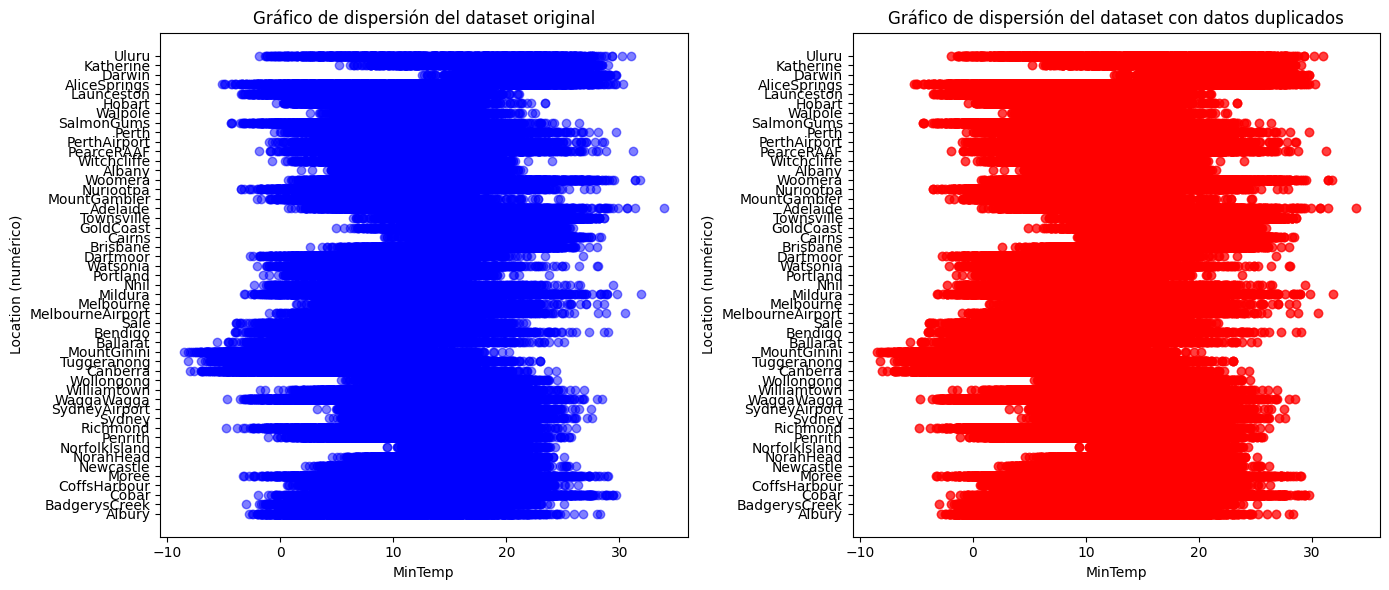

In [42]:
# Crear gráficos
import matplotlib.pyplot as plt
# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Primer gráfico: Solo datos originales
plt.subplot(1, 2, 1)
plt.scatter(X['MinTemp'], X['Location'], alpha=0.5, color='blue')
plt.title('Gráfico de dispersión del dataset original')
plt.ylabel('Location (numérico)')
plt.xlabel('MinTemp')

# Segundo gráfico: Datos originales + datos duplicados
plt.subplot(1, 2, 2)
plt.scatter(X_duplicated_both['MinTemp'], X_duplicated_both['Location'], alpha=0.5, color='red')
plt.title('Gráfico de dispersión del dataset con datos duplicados')
plt.ylabel('Location (numérico)')
plt.xlabel('MinTemp')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()